## SDSS-17 Stellar Classificaiton

This notebook uses the 'Stellar Classificaiton Dataset - SDSS17' on Kaggle (https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17/data)

This project will use a Random Forest to attempt to classify each object in the dataset as a Star, Galaxy, or Quasar Object. 

### Import Packages

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

### Reading in Data

In [3]:
df = pd.read_csv("dataset/star_classification.csv")
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


### Handling Missing Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [5]:
df.isna().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

In [6]:
df.isnull().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df['class'].unique()

array(['GALAXY', 'QSO', 'STAR'], dtype=object)

Data seems to have no missing value or duplicated entries.

### Preparing Data

In [9]:
df['class'].value_counts()

class
GALAXY    59445
STAR      21594
QSO       18961
Name: count, dtype: int64

Need to using label encoding to convert **'class'** features to numeric values.

In [10]:
le = LabelEncoder()
le.fit(df['class'])

df['class'] = le.transform(df['class'])
df['class'].unique()

array([0, 1, 2])

In [11]:
le.classes_

array(['GALAXY', 'QSO', 'STAR'], dtype=object)

- GALAXY -> 0
- QSO -> 1
- STAR -> 2

In [12]:
X = df.drop('class', axis=1).copy()
X.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,0.116123,6121,56187,842


Will drop more features here, as a lot of them are useless for classification. 

In [13]:
X = X.drop(['obj_ID',
            'alpha',
            'delta',
            'run_ID',
            'rerun_ID',
            'cam_col',
            'field_ID',
            'spec_obj_ID',
            'MJD',
            'fiber_ID'], axis=1)

X.head()

,u,g,r,i,z,redshift,plate
0,23.87882,22.27530,20.39501,19.16573,18.79371,0.634794,5812
1,24.77759,22.83188,22.58444,21.16812,21.61427,0.779136,10445
2,25.26307,22.66389,20.60976,19.34857,18.94827,0.644195,4576
3,22.13682,23.77656,21.61162,20.50454,19.25010,0.932346,9149
4,19.43718,17.58028,16.49747,15.97711,15.54461,0.116123,6121


In [14]:
y = df['class'].copy()
y.head(10)

0    0
1    0
2    0
3    0
4    0
5    1
6    1
7    0
8    0
9    2
Name: class, dtype: int64

### Building Preliminary Model

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [16]:
clf_rf = RandomForestClassifier(oob_score=True, random_state=420)

clf_rf.fit(X_train, y_train)

RandomForestClassifier(oob_score=True, random_state=420)

In [17]:
y_test_pred = clf_rf.predict(X_test)

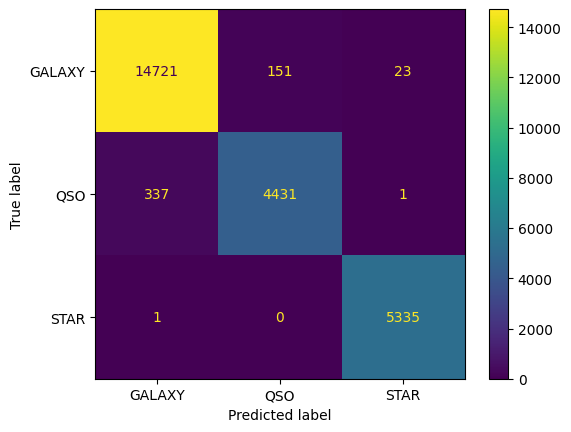

In [18]:
cm = confusion_matrix(y_test, y_test_pred)
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                 display_labels=['GALAXY', 'QSO', 'STAR']) 

cm_disp.plot()

In [19]:
print(f"Accuracy score: {clf_rf.score(X_test, y_test)}")
print(f"Out of Bag Score: {clf_rf.oob_score_}")

Accuracy score: 0.97948
Out of Bag Score: 0.979


**Self Note:** Simple explanation of OOB > https://www.analyticsvidhya.com/blog/2020/12/out-of-bag-oob-score-in-the-random-forest-algorithm/

Below shows the important features in classifying the data. 

<Axes: title={'center': 'Feature Importance for Classification'}, xlabel='Feature', ylabel='Importance (%)'>

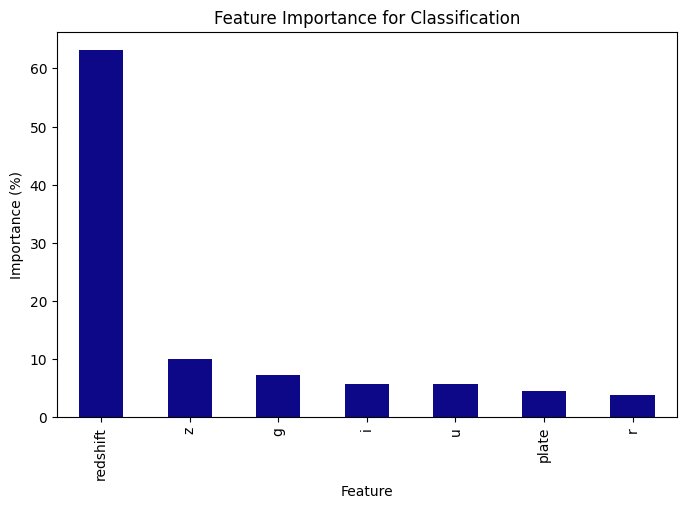

In [20]:
features = pd.DataFrame({'feature' : X_train.columns,
                         'importance' : clf_rf.feature_importances_ * 100}).sort_values(by='importance', ascending=False)

features.plot(x = 'feature',
              y = 'importance',
              kind = 'bar',
              xlabel = 'Feature',
              ylabel = 'Importance (%)',
              title = 'Feature Importance for Classification',
              colormap = 'plasma',
              legend = False,
              figsize = (8,5))

### Conclusion

The Random Forest was pretty good out of the box, with scores:
- Accuracy score: 0.97948
- Out of Bag Score: 0.979

From analysing the feature importance graph, **redshit** is the clear contributor at over **60%**, compared to the next heaviest contributor (**z** at approx. **10%**).

To improve the model's performance further, hyperparameter tuning could improve the scores, as well as taking into account the imbalance of Galaxies, QSOs and Stars in the dataset.